## PV paramter extraction from a Si solar cell and µSMU

- Measure the JV curves of solar cell using the micro-SMU
- Import data into the Jupyter Notebok and analyse using python3
- Plot the JV curve
- Extract parameters of the solar cell: Voc, Jsc, FF, Vmax,  Imax 

In [17]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [12]:
# Import data into Jupyter Notebook 

filename = 'data/celdaSi_ligh_near_01.dat' # Under Light (White LED lamp with 500 W/m2 irradiance)
np_data = np.loadtxt(filename, delimiter=',', skiprows =2) # Import as np.ndarray

In [13]:
#Separate data in two arrays - V and J 

V = np_data[:,0] # voltage is in [V]
J = np_data[:,1] # current density is in [mA/cm2]

In [15]:
# Find Voc_approx and Jsc_approx

a = [J > 0 ] #Voc_approx is located when J > 0 
Voc_approx = np.min(V[(J>0)])
Voc_approx = round(Voc_approx,4) 

b = (V < 0)  #Jsc_approx is located when V < 0 
Jsc_approx = np.max(J[(V<0)])
Jsc_approx = round(Jsc_approx,4)

In [20]:
# Find Fill Factor 

P = J*V # mW/cm2
P_min = np.min(P)
FF_approx = P_min/(Voc_approx*Jsc_approx)
FF_approx = round(FF_approx,4)

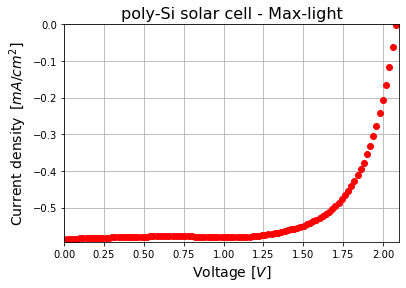

In [18]:
# Plot the JV curve with the approximated values of Voc and Jsc

# Print data inside the Voc anc Jsc limits 

plt.plot(V,J,'or')
plt.ylim(np.min(J),0)
plt.xlim(0,Voc_approx) # Plot the 4th quadrant from 0 to Voc_approx

plt.title('poly-Si solar cell - Max-light', fontsize =16)
plt.ylabel('Current density $ \:[mA/cm^2]$', fontsize=14)
plt.xlabel('Voltage $[V]$', fontsize=14)

plt.grid()
plt.show()

In [23]:
print (f'Voc_approx = {Voc_approx} V')
print (f'Jsc_approx = {Jsc_approx} mA/cm2')
print (f'FF_approx  = {FF_approx} V')

Voc_approx = 2.0999 V
Jsc_approx = -0.5867 mA/cm2
FF_approx  = 0.6888 V
